In [2]:
import glob
import pyedflib
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from config.config import DataConfig

In [3]:
data_dir = DataConfig.BASE_PATH
subject_dirs = sorted([
    os.path.join(data_dir, d)
    for d in os.listdir(data_dir)
    if d.startswith("EPCTL") and os.path.isdir(os.path.join(data_dir, d))
])

In [4]:
# seeing what's there

first_subject = subject_dirs[0]

# Locate the .edf and .txt files in the first subject folder
edf_files = glob.glob(os.path.join(first_subject, "*.edf"))
txt_files = glob.glob(os.path.join(first_subject, "*.txt"))

if edf_files:
    edf_file = edf_files[0]
    print("Processing EDF file:", edf_file)
    reader = pyedflib.EdfReader(edf_file)
    header = reader.getHeader()
    num_signals = reader.signals_in_file
    signal_labels = reader.getSignalLabels()
    sample_frequencies = [reader.getSampleFrequency(i) for i in range(num_signals)]
    nsamples = reader.getNSamples()
    
    print("\nEDF File Attributes:")
    for key, value in header.items():
        print(f"{key}: {value}")
    print("\nSignal Details:")
    print("Number of signals:", num_signals)
    print("Signal labels:", signal_labels)
    print("Sample frequencies:", sample_frequencies)
    print("Number of samples per signal:", nsamples)
    reader.close()
else:
    print("No EDF file found in", first_subject)

if txt_files:
    txt_file = txt_files[0]
    print("\nProcessing TXT file:", txt_file)
    with open(txt_file, 'r') as f:
        txt_content = f.read()
    num_lines = txt_content.count('\n') + 1
    num_words = len(txt_content.split())
    num_chars = len(txt_content)
    
    print("\nTXT File Attributes:")
    print("Number of lines:", num_lines)
    print("Number of words:", num_words)
    print("Number of characters:", num_chars)
else:
    print("No TXT file found in", first_subject)

Processing EDF file: /Users/kimberly/Documents/STAT4830/STAT-4830-GOALZ-project/Anphy Dataset/EPCTL01/EPCTL01.edf

EDF File Attributes:
technician: 
recording_additional: 
patientname: X
patient_additional: 
patientcode: 
equipment: AnyWave EDF+ exporter
admincode: 
sex: 
startdate: 2023-12-20 15:40:20
birthdate: 
gender: 

Signal Details:
Number of signals: 93
Signal labels: ['Fp1-Ref', 'Fp2-Ref', 'F3-Ref', 'F4-Ref', 'C3-Ref', 'C4-Ref', 'P3-Ref', 'P4-Ref', 'O1-Ref', 'O2-Ref', 'F7-Ref', 'F8-Ref', 'T3-Ref', 'T4-Ref', 'T5-Ref', 'T6-Ref', 'FZ-Ref', 'CZ-Ref', 'PZ-Ref', 'SO1-Ref', 'SO2-Ref', 'F9-Ref', 'F10-Ref', 'ZY1', 'ZY2', 'T9-Ref', 'T10-Ref', 'P9-Ref', 'P10-Ref', 'AF7-Ref', 'AF3-Ref', 'F11', 'F5-Ref', 'F1-Ref', 'FT11', 'FT9-Ref', 'FT7-Ref', 'FC5-Ref', 'FC3-Ref', 'FC1-Ref', 'FCZ-Ref', 'C5-Ref', 'C1-Ref', 'TP11', 'TP9-Ref', 'TP7-Ref', 'CP3-Ref', 'CP1-Ref', 'P11', 'P5-Ref', 'P1-Ref', 'PO7-Ref', 'PO3-Ref', 'POZ-Ref', 'OZ-Ref', 'FPZ-Ref', 'AFZ-Ref', 'AF4-Ref', 'AF8-Ref', 'F2-Ref', 'F6-Ref', 

In [ ]:
# # converting sleep stage labels to csv files

# # subject_dirs = sorted([
# #     os.path.join(data_dir, d)
# #     for d in os.listdir(data_dir)
# #     if d.startswith("EPCTL") and os.path.isdir(os.path.join(data_dir, d))
# # ])

# for folder in subject_dirs:
#     # Find the .txt file in the subject folder
#     txt_files = glob.glob(os.path.join(folder, "*.txt"))
#     if not txt_files:
#         print(f"No .txt file found in {folder}")
#         continue
    
#     txt_file = txt_files[0]
#     # Read the text file (whitespace-delimited, no header)
#     df = pd.read_csv(txt_file, sep=r"\s+", header=None, names=["stage", "time_index", "time_step"])
    
#     # Create a .csv filename in the same folder
#     base_name = os.path.splitext(os.path.basename(txt_file))[0]  # e.g., "EPCTL01" (if that's the .txt filename)
#     csv_file = os.path.join(folder, base_name + ".csv")
    
#     # Write DataFrame to CSV with row indices
#     df.to_csv(csv_file, index=True)
#     print(f"Converted {txt_file} -> {csv_file}")

Plotting

In [ ]:
# subject1 = subject_dirs[0]
# edf_files = glob.glob(os.path.join(subject1, "*.edf"))

# if edf_files:
#     edf_file = edf_files[0]
#     reader = pyedflib.EdfReader(edf_file)
#     fs = reader.getSampleFrequency(0)  # sample frequency
    
#     # Read the first few electrode signals
#     signal1 = reader.readSignal(0)
#     signal2 = reader.readSignal(1)
    
#     # Create a time axis (in seconds)
#     time = np.arange(len(signal1)) / fs
    
#     # Plot the two signals
#     plt.figure(figsize=(14, 6))
#     plt.plot(time, signal1, label="Electrode 1")
#     plt.plot(time, signal2, label="Electrode 2")
#     plt.xlabel("Time (s)")
#     plt.ylabel("Signal Amplitude")
#     plt.title("Subject 1: First Two Electrode Signals")
#     plt.legend()
#     plt.show()
    
#     reader.close()
# else:
#     print("No EDF file found in:", subject1)

In [ ]:
subject1 = subject_dirs[0]
edf_files = glob.glob(os.path.join(subject1, "*.edf"))

if edf_files:
    edf_file = edf_files[0]
    reader = pyedflib.EdfReader(edf_file)
    fs = reader.getSampleFrequency(0)
    signal1 = reader.readSignal(0)
    signal2 = reader.readSignal(1)
    signal3 = reader.readSignal(2)
    time = np.arange(len(signal1)) / fs

    # n = 1000  # decimation factor
    n = 500000
    indices = np.arange(0, len(time), n)

    plt.figure(figsize=(14, 6))
    plt.stem(time[indices], signal1[indices],
             linefmt='C0-', markerfmt='C0o', basefmt='C0-', label="Electrode 1")
    plt.stem(time[indices], signal2[indices],
             linefmt='C1-', markerfmt='C1o', basefmt='C1-', label="Electrode 2")
    plt.stem(time[indices], signal3[indices],
             linefmt='C2-', markerfmt='C2o', basefmt='C2-', label="Electrode 3")
    plt.xlabel("Time (s)")
    plt.ylabel("Signal Amplitude")
    plt.title("Subject 1: Stem plot of first three electrode signals)")
    plt.legend()
    plt.show()
    
    reader.close()
else:
    print("No EDF file found in:", subject1)

In [ ]:
subject1 = subject_dirs[0]
edf_files = glob.glob(os.path.join(subject1, "*.edf"))

if edf_files:
    edf_file = edf_files[0]
    reader = pyedflib.EdfReader(edf_file)
    fs = reader.getSampleFrequency(0)
    signal1 = reader.readSignal(0)
    signal2 = reader.readSignal(1)
    signal3 = reader.readSignal(2)
    time = np.arange(len(signal1)) / fs

    n = 10000  # decimation factor: every 10000th sample
    indices = np.arange(0, len(time), n)

    plt.figure(figsize=(14, 6))
    plt.stem(time[indices], signal1[indices],
             linefmt='C0-', markerfmt='C0o', basefmt='C0-', label="Electrode 1")
    plt.stem(time[indices], signal2[indices],
             linefmt='C1-', markerfmt='C1o', basefmt='C1-', label="Electrode 2")
    plt.stem(time[indices], signal3[indices],
             linefmt='C2-', markerfmt='C2o', basefmt='C2-', label="Electrode 3")
    plt.xlabel("Time (s)")
    plt.ylabel("Signal Amplitude")
    plt.title("Subject 1: Stem plot of first three electrode signals (every 1000th sample)")
    plt.legend()
    plt.show()
    
    reader.close()
else:
    print("No EDF file found in:", subject1)

In [ ]:
subject1 = subject_dirs[0]
edf_files = glob.glob(os.path.join(subject1, "*.edf"))

if edf_files:
    edf_file = edf_files[0]
    reader = pyedflib.EdfReader(edf_file)
    fs = reader.getSampleFrequency(0)
    num_samples = reader.getNSamples()[0]
    time = np.arange(num_samples) / fs
    labels = reader.getSignalLabels()

    n = 100000  # decimation factor
    indices = np.arange(0, len(time), n)

    plt.figure(figsize=(14, 6))
    for ch in range(10):
        signal = reader.readSignal(ch)
        # matplotlib color cycle: "C0", "C1", ..., "C9"
        color_code = f"C{ch}"
        plt.stem(time[indices], signal[indices],
                 linefmt=color_code + "-", 
                 markerfmt=color_code + "o", 
                 basefmt="k-",  # base line black
                 label=labels[ch])
    
    plt.xlabel("Time (s)")
    plt.ylabel("Signal Amplitude")
    plt.title("Subject 1: Stem Plot of First 10 Electrode Signals")
    plt.legend(loc='upper right', fontsize='small', ncol=2)
    plt.show()
    
    reader.close()
else:
    print("No EDF file found in:", subject1)


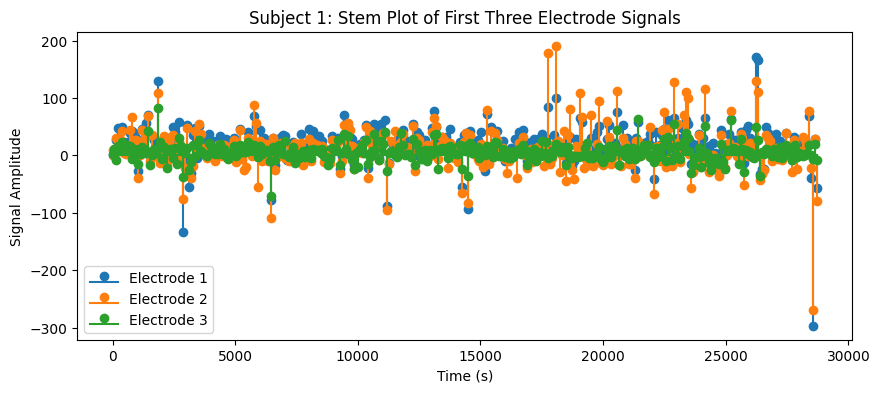

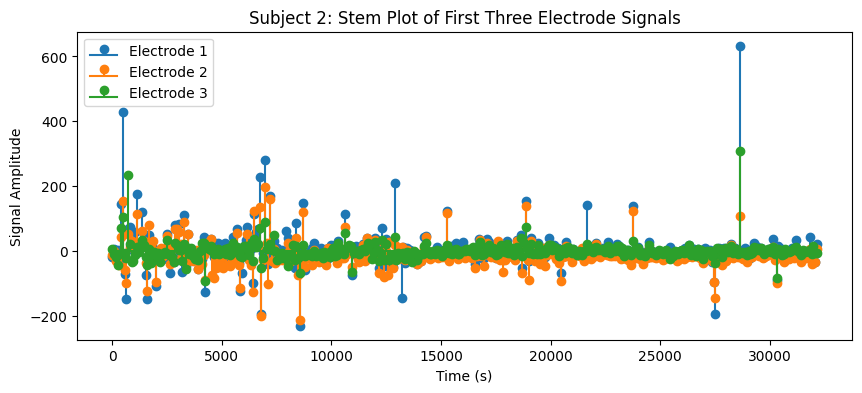

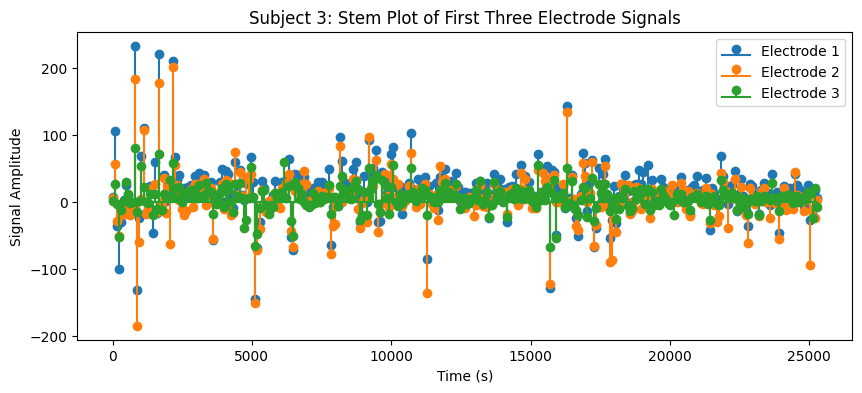

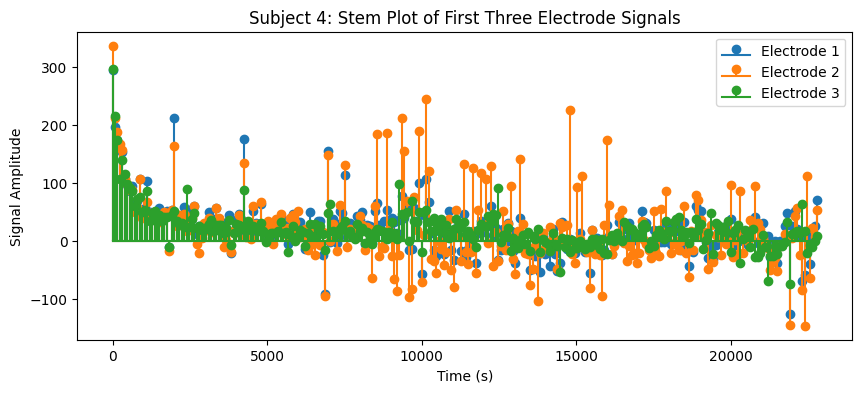

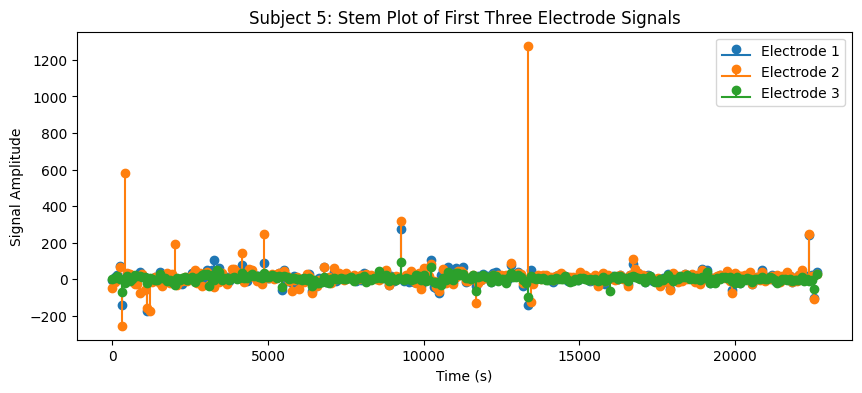

In [4]:
for i in range(5):  # loop over the first ... subjects
    subject_path = subject_dirs[i]
    edf_files = glob.glob(os.path.join(subject_path, "*.edf"))
    
    if edf_files:
        edf_file = edf_files[0]  # use the first EDF file found
        reader = pyedflib.EdfReader(edf_file)
        
        fs = reader.getSampleFrequency(0)
        signal1 = reader.readSignal(0)
        signal2 = reader.readSignal(1)
        signal3 = reader.readSignal(2)
        time = np.arange(len(signal1)) / fs
        
        # Decimation factor
        n = 80000
        indices = np.arange(0, len(time), n)
        
        plt.figure(figsize=(10,4))
        plt.stem(time[indices], signal1[indices],
                 linefmt='C0-', markerfmt='C0o', basefmt='C0-', label="Electrode 1")
        plt.stem(time[indices], signal2[indices],
                 linefmt='C1-', markerfmt='C1o', basefmt='C1-', label="Electrode 2")
        plt.stem(time[indices], signal3[indices],
                 linefmt='C2-', markerfmt='C2o', basefmt='C2-', label="Electrode 3")
        
        plt.xlabel("Time (s)")
        plt.ylabel("Signal Amplitude")
        plt.title(f"Subject {i+1}: Stem Plot of First Three Electrode Signals")
        plt.legend()
        plt.show()
        
        reader.close()
    else:
        print(f"No EDF file found in: {subject_path}")